<a href="https://colab.research.google.com/github/IISuperluminaLII/SCGAN/blob/main/wgan-gp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install tensorflow==1.14.0
!pip install keras==2.2.4

     |████████████████████████████████| 109.2MB 52kB/s 
     |████████████████████████████████| 3.2MB 96kB/s 
     |████████████████████████████████| 491kB 44.8MB/s 
     |████████████████████████████████| 51kB 6.3MB/s 
  Found existing installation: tensorboard 2.3.0
    Uninstalling tensorboard-2.3.0:
      Successfully uninstalled tensorboard-2.3.0
  Found existing installation: tensorflow-estimator 2.3.0
    Uninstalling tensorflow-estimator-2.3.0:
      Successfully uninstalled tensorflow-estimator-2.3.0
  Found existing installation: tensorflow 2.3.0
    Uninstalling tensorflow-2.3.0:
      Successfully uninstalled tensorflow-2.3.0


     |████████████████████████████████| 317kB 2.8MB/s 
  Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3


In [1]:
from __future__ import print_function, division

import os
import tensorflow as tf
from keras.layers.merge import _Merge
from keras.layers import Input, Dense, Reshape, Flatten, Dropout
from keras.layers import BatchNormalization, Activation, ZeroPadding2D, Conv2DTranspose, SpatialDropout2D, GaussianNoise
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.models import Sequential, Model
from keras.optimizers import RMSprop
from functools import partial
from keras.constraints import max_norm

import keras.backend as K

import matplotlib.pyplot as plt
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import sys

import numpy as np
from keras_preprocessing.image import img_to_array, load_img
# tf.config.optimizer.set_jit(True)
# tf.config.optimizer.set_experimental_options(options={'arithmetic_optimizatio':True, 'shape_optimization':True})


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

Process IMG? (Enter)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1024)              102400    
_________________________________________________________________
reshape_2 (Reshape)          (None, 2, 2, 256)         0         
_________________________________________________________________
FIRST_UP_CONV (Conv2DTranspo (None, 4, 4, 256)         262400    
_________________________________________________________________
B1 (BatchNormalization)      (None, 4, 4, 256)         1024      
_________________________________________________________________
A1 (Activation)              (None, 4, 4, 256)         0         
_________________________________________________________________
SECOND_UP_CONV (Conv2DTransp (None, 8, 8, 128)         524416    
_________________________________________________________________
B2 (BatchNormalization)      (None, 8, 8, 128)         

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


0 [D loss: 9.485204] [G loss: -0.491421]


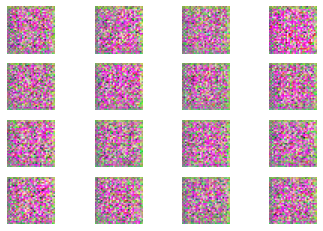

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


1 [D loss: 9.716263] [G loss: -0.262908]
2 [D loss: 9.600033] [G loss: -0.287408]
3 [D loss: 9.933245] [G loss: -0.445379]
4 [D loss: 9.767418] [G loss: -0.534145]
5 [D loss: 9.424613] [G loss: -0.684590]
6 [D loss: 9.795483] [G loss: -0.518762]
7 [D loss: 9.470697] [G loss: -0.735805]
8 [D loss: 9.692319] [G loss: -0.469637]
9 [D loss: 9.563403] [G loss: -0.762006]
10 [D loss: 9.450819] [G loss: -0.401534]


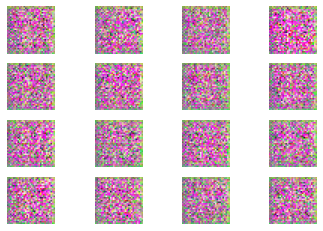

11 [D loss: 10.109296] [G loss: -0.520199]
12 [D loss: 9.165134] [G loss: -0.352965]
13 [D loss: 9.117906] [G loss: -0.603417]
14 [D loss: 9.523164] [G loss: -0.561218]
15 [D loss: 9.060257] [G loss: -0.479802]
16 [D loss: 9.012397] [G loss: -0.532282]
17 [D loss: 9.058612] [G loss: -0.544106]
18 [D loss: 8.846464] [G loss: -0.446182]
19 [D loss: 8.887257] [G loss: -0.535552]
20 [D loss: 9.365348] [G loss: -0.489616]


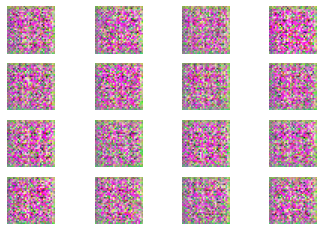

21 [D loss: 8.806993] [G loss: -0.487426]
22 [D loss: 9.178826] [G loss: -0.404469]
23 [D loss: 9.016390] [G loss: -0.432817]
24 [D loss: 8.640839] [G loss: -0.521213]
25 [D loss: 9.395267] [G loss: -0.413685]
26 [D loss: 9.735158] [G loss: -0.704709]
27 [D loss: 8.605463] [G loss: -0.548761]
28 [D loss: 8.563802] [G loss: -0.542481]
29 [D loss: 8.713846] [G loss: -0.841202]
30 [D loss: 8.972110] [G loss: -0.533370]


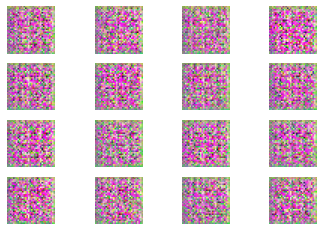

31 [D loss: 8.782928] [G loss: -0.862832]
32 [D loss: 8.649067] [G loss: -0.534962]
33 [D loss: 8.625002] [G loss: -0.458007]
34 [D loss: 8.604070] [G loss: -0.500403]
35 [D loss: 8.699841] [G loss: -0.756001]
36 [D loss: 8.630260] [G loss: -0.780430]
37 [D loss: 8.339572] [G loss: -0.542788]
38 [D loss: 8.617052] [G loss: -0.598332]
39 [D loss: 8.435518] [G loss: -0.687656]
40 [D loss: 7.874531] [G loss: -0.592075]


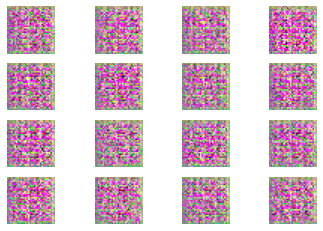

41 [D loss: 8.026466] [G loss: -0.849335]
42 [D loss: 7.432963] [G loss: -0.332484]
43 [D loss: 8.202314] [G loss: -0.580008]
44 [D loss: 8.265394] [G loss: -0.701239]
45 [D loss: 9.092736] [G loss: -0.518878]
46 [D loss: 8.862000] [G loss: -0.733273]
47 [D loss: 7.818738] [G loss: -0.410886]
48 [D loss: 8.086756] [G loss: -0.300317]
49 [D loss: 8.816798] [G loss: -0.698109]
50 [D loss: 8.988592] [G loss: -0.885351]


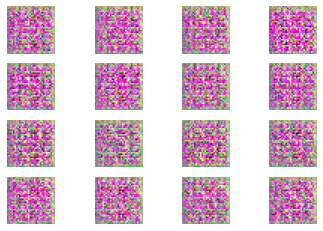

51 [D loss: 7.885669] [G loss: -0.492097]
52 [D loss: 9.493475] [G loss: -0.454467]
53 [D loss: 8.366754] [G loss: -0.441247]
54 [D loss: 9.185259] [G loss: -0.752591]
55 [D loss: 8.588630] [G loss: -0.785996]
56 [D loss: 7.590837] [G loss: -0.712537]
57 [D loss: 7.727380] [G loss: -0.699559]
58 [D loss: 8.417755] [G loss: -0.535059]
59 [D loss: 8.651946] [G loss: -0.520984]
60 [D loss: 8.558756] [G loss: -0.735450]


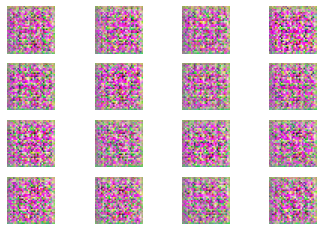

61 [D loss: 8.258574] [G loss: -0.834303]
62 [D loss: 7.706029] [G loss: -0.791696]
63 [D loss: 9.073737] [G loss: -0.832214]
64 [D loss: 8.450999] [G loss: -0.448336]
65 [D loss: 9.163388] [G loss: -0.784319]
66 [D loss: 9.078586] [G loss: -0.502624]
67 [D loss: 8.372669] [G loss: -0.434266]
68 [D loss: 7.118874] [G loss: -0.839809]
69 [D loss: 9.142220] [G loss: -0.736666]
70 [D loss: 7.827100] [G loss: -0.380227]


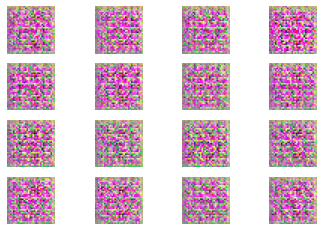

71 [D loss: 8.516383] [G loss: -0.744639]
72 [D loss: 8.320358] [G loss: -0.954261]
73 [D loss: 8.712390] [G loss: -0.373699]
74 [D loss: 6.863027] [G loss: -0.939533]
75 [D loss: 8.155045] [G loss: -0.723084]
76 [D loss: 8.726974] [G loss: -0.756785]
77 [D loss: 7.323232] [G loss: -0.400246]
78 [D loss: 9.061772] [G loss: -0.652596]
79 [D loss: 8.351970] [G loss: -0.451467]
80 [D loss: 9.010239] [G loss: -0.876928]


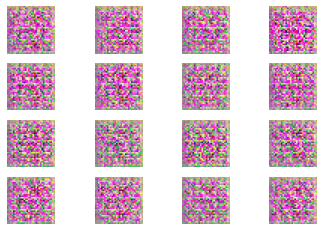

81 [D loss: 7.891232] [G loss: -0.696507]
82 [D loss: 7.835402] [G loss: -0.589924]
83 [D loss: 7.540677] [G loss: -0.586912]
84 [D loss: 8.697650] [G loss: -0.403013]
85 [D loss: 8.888744] [G loss: -0.168143]
86 [D loss: 7.468994] [G loss: -0.283294]
87 [D loss: 8.778706] [G loss: -0.732791]
88 [D loss: 9.068859] [G loss: -0.347741]
89 [D loss: 9.141108] [G loss: -0.713608]
90 [D loss: 6.862493] [G loss: -0.684543]


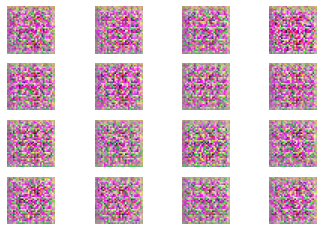

91 [D loss: 8.064557] [G loss: -0.688143]
92 [D loss: 7.267025] [G loss: -0.405219]
93 [D loss: 6.695032] [G loss: -0.535988]
94 [D loss: 6.285771] [G loss: -0.507648]
95 [D loss: 8.049350] [G loss: -0.500474]
96 [D loss: 8.088168] [G loss: -0.701212]
97 [D loss: 8.154454] [G loss: -0.715700]
98 [D loss: 8.309178] [G loss: -0.830820]
99 [D loss: 7.333797] [G loss: -0.581232]
100 [D loss: 6.741061] [G loss: -0.728202]


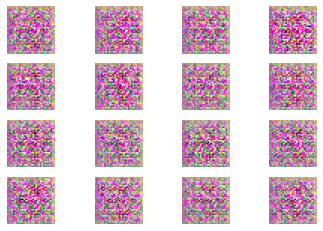

101 [D loss: 8.702231] [G loss: -0.943571]
102 [D loss: 10.077806] [G loss: -0.715032]
103 [D loss: 8.401175] [G loss: -0.608640]
104 [D loss: 7.480119] [G loss: -0.639154]
105 [D loss: 7.970751] [G loss: -0.683337]
106 [D loss: 8.881767] [G loss: -0.707505]
107 [D loss: 7.845035] [G loss: -0.377462]
108 [D loss: 9.183249] [G loss: -0.625885]
109 [D loss: 7.991387] [G loss: -0.750499]
110 [D loss: 7.124045] [G loss: -0.586625]


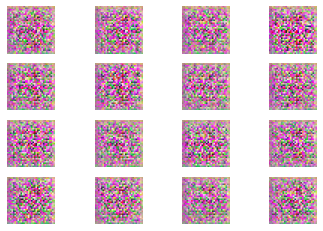

111 [D loss: 7.126777] [G loss: -0.365858]
112 [D loss: 7.750931] [G loss: -0.767692]
113 [D loss: 7.797916] [G loss: -0.470188]
114 [D loss: 8.010118] [G loss: -0.780166]
115 [D loss: 7.744434] [G loss: -0.757665]
116 [D loss: 8.021903] [G loss: -0.269309]
117 [D loss: 9.665973] [G loss: -0.984481]
118 [D loss: 8.166165] [G loss: -0.970090]
119 [D loss: 10.038155] [G loss: -0.441704]
120 [D loss: 7.501852] [G loss: -0.555986]


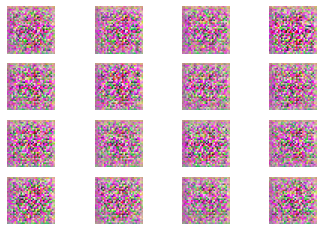

121 [D loss: 6.124876] [G loss: -0.846712]
122 [D loss: 8.652416] [G loss: -0.656057]
123 [D loss: 8.662187] [G loss: -0.924379]
124 [D loss: 7.092389] [G loss: -0.493246]
125 [D loss: 7.805243] [G loss: -0.842295]
126 [D loss: 7.379659] [G loss: -0.820830]
127 [D loss: 8.013008] [G loss: -0.864135]
128 [D loss: 7.453223] [G loss: -0.937952]
129 [D loss: 7.898325] [G loss: -0.482755]
130 [D loss: 7.627925] [G loss: -0.676739]


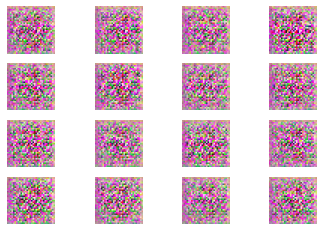

131 [D loss: 6.592039] [G loss: -0.886926]
132 [D loss: 8.343185] [G loss: -0.425862]
133 [D loss: 8.876024] [G loss: -0.862321]
134 [D loss: 7.538078] [G loss: -0.955276]
135 [D loss: 7.989251] [G loss: -0.884220]
136 [D loss: 7.679675] [G loss: -0.752517]
137 [D loss: 7.771244] [G loss: -0.611126]
138 [D loss: 6.443959] [G loss: -0.978989]
139 [D loss: 8.029630] [G loss: -0.978490]
140 [D loss: 8.809367] [G loss: -0.740443]


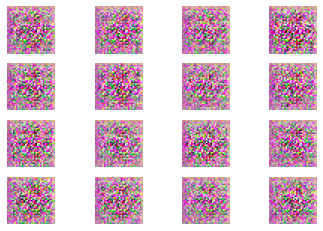

141 [D loss: 8.283219] [G loss: -0.902985]
142 [D loss: 6.066657] [G loss: -0.896338]
143 [D loss: 9.232266] [G loss: -0.801172]
144 [D loss: 8.125594] [G loss: -0.828404]
145 [D loss: 8.333332] [G loss: -0.496522]
146 [D loss: 8.609366] [G loss: -0.650939]
147 [D loss: 6.758204] [G loss: -0.935648]
148 [D loss: 8.004841] [G loss: -0.866632]
149 [D loss: 9.522964] [G loss: -0.474099]
150 [D loss: 8.028391] [G loss: -0.599377]


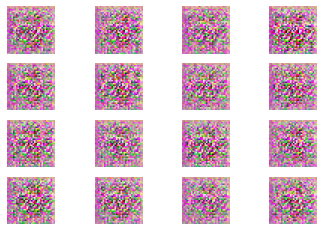

151 [D loss: 7.584092] [G loss: -0.496548]
152 [D loss: 8.889631] [G loss: -0.669909]
153 [D loss: 8.885689] [G loss: -0.892061]
154 [D loss: 7.526830] [G loss: -0.999728]
155 [D loss: 9.703094] [G loss: -0.817234]
156 [D loss: 9.015811] [G loss: -0.843789]
157 [D loss: 7.965943] [G loss: -0.962954]
158 [D loss: 9.680305] [G loss: -0.494115]
159 [D loss: 8.389155] [G loss: -0.572051]
160 [D loss: 8.477316] [G loss: -0.824286]


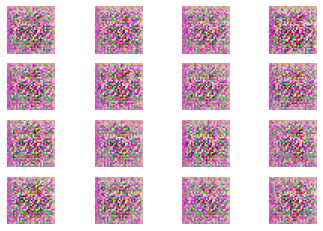

161 [D loss: 6.132281] [G loss: -0.721450]
162 [D loss: 6.888135] [G loss: -0.628815]
163 [D loss: 9.089535] [G loss: -0.737885]
164 [D loss: 8.398335] [G loss: -0.876270]
165 [D loss: 7.923456] [G loss: -0.727949]
166 [D loss: 6.493054] [G loss: -0.708523]
167 [D loss: 8.304186] [G loss: -0.754773]
168 [D loss: 8.206966] [G loss: -0.516060]
169 [D loss: 7.938761] [G loss: -0.681886]
170 [D loss: 6.745705] [G loss: -0.477082]


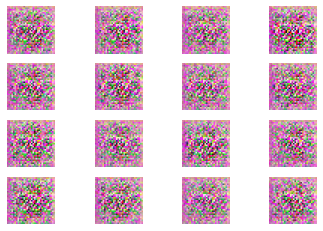

171 [D loss: 8.527696] [G loss: -0.870137]
172 [D loss: 9.486481] [G loss: -0.657737]
173 [D loss: 9.506801] [G loss: -0.795859]
174 [D loss: 7.156516] [G loss: -0.559983]
175 [D loss: 8.298290] [G loss: -0.978592]
176 [D loss: 8.272463] [G loss: -0.885430]
177 [D loss: 6.878820] [G loss: -0.838286]
178 [D loss: 7.901894] [G loss: -0.845790]
179 [D loss: 8.109886] [G loss: -0.590164]
180 [D loss: 7.873682] [G loss: -0.700259]


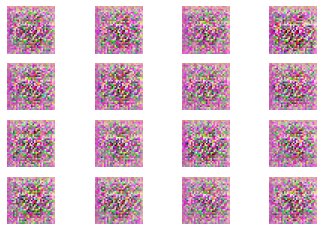

181 [D loss: 8.972544] [G loss: -0.801776]
182 [D loss: 8.822745] [G loss: -0.925551]
183 [D loss: 9.721511] [G loss: -0.755197]
184 [D loss: 8.745549] [G loss: -0.982865]
185 [D loss: 6.754530] [G loss: -0.449904]
186 [D loss: 9.745255] [G loss: -0.782231]
187 [D loss: 9.228624] [G loss: -0.842617]
188 [D loss: 7.909810] [G loss: -0.799239]
189 [D loss: 9.393165] [G loss: -0.837571]
190 [D loss: 5.695005] [G loss: -0.799366]


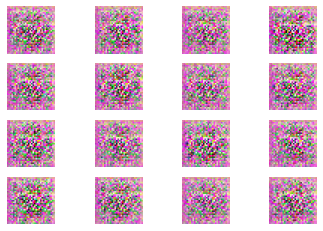

191 [D loss: 7.729242] [G loss: -0.762164]
192 [D loss: 7.020764] [G loss: -0.921857]
193 [D loss: 7.898516] [G loss: -0.789921]
194 [D loss: 7.837704] [G loss: -0.772734]
195 [D loss: 6.891862] [G loss: -0.755991]
196 [D loss: 8.861940] [G loss: -0.842674]
197 [D loss: 7.743480] [G loss: -0.722396]
198 [D loss: 8.996432] [G loss: -0.699313]
199 [D loss: 7.880992] [G loss: -0.708532]
200 [D loss: 7.569024] [G loss: -0.976011]


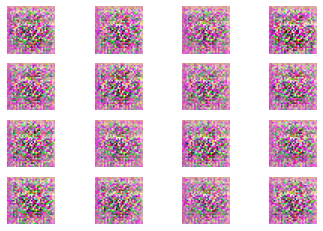

201 [D loss: 8.459579] [G loss: -0.862081]
202 [D loss: 8.028998] [G loss: -0.987606]
203 [D loss: 7.404914] [G loss: -0.691058]
204 [D loss: 7.311339] [G loss: -0.804672]
205 [D loss: 6.713770] [G loss: -0.582226]
206 [D loss: 8.044669] [G loss: -0.694778]
207 [D loss: 7.567242] [G loss: -0.587720]
208 [D loss: 8.525242] [G loss: -0.952393]
209 [D loss: 8.466226] [G loss: -0.482314]
210 [D loss: 7.049596] [G loss: -0.417578]


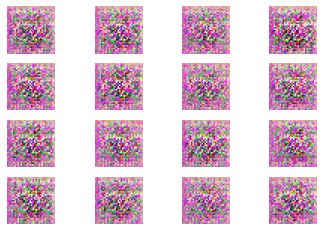

211 [D loss: 8.828416] [G loss: -0.720094]
212 [D loss: 7.872970] [G loss: -0.780463]
213 [D loss: 8.685730] [G loss: -0.869263]
214 [D loss: 9.961262] [G loss: -0.989550]
215 [D loss: 8.310633] [G loss: -0.649066]
216 [D loss: 8.929133] [G loss: -0.999832]
217 [D loss: 6.722845] [G loss: -0.662156]
218 [D loss: 8.800365] [G loss: -0.756252]
219 [D loss: 7.791149] [G loss: -0.601295]
220 [D loss: 7.379160] [G loss: -0.599925]


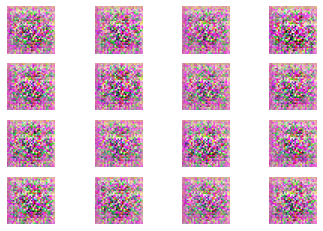

221 [D loss: 9.125891] [G loss: -0.936658]
222 [D loss: 8.528178] [G loss: -0.964672]
223 [D loss: 7.192991] [G loss: -0.913037]
224 [D loss: 7.420959] [G loss: -0.991117]
225 [D loss: 8.004215] [G loss: -0.821351]
226 [D loss: 10.763653] [G loss: -0.612220]
227 [D loss: 9.104281] [G loss: -0.955127]
228 [D loss: 9.051223] [G loss: -0.787126]
229 [D loss: 9.389556] [G loss: -0.778578]
230 [D loss: 8.928459] [G loss: -0.738013]


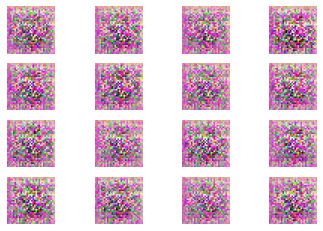

231 [D loss: 9.396008] [G loss: -0.629579]
232 [D loss: 5.905427] [G loss: -0.948754]
233 [D loss: 8.896195] [G loss: -0.748263]
234 [D loss: 7.790794] [G loss: -0.777240]
235 [D loss: 6.155202] [G loss: -0.601556]
236 [D loss: 8.578218] [G loss: -0.117586]
237 [D loss: 9.238831] [G loss: -0.726853]
238 [D loss: 6.377279] [G loss: -0.864627]
239 [D loss: 7.538789] [G loss: -0.405562]
240 [D loss: 7.656958] [G loss: -0.381296]


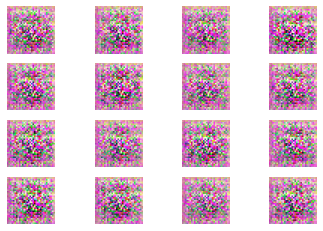

241 [D loss: 8.557755] [G loss: -0.403890]
242 [D loss: 7.605861] [G loss: -0.853435]
243 [D loss: 7.655351] [G loss: -0.606388]
244 [D loss: 7.452243] [G loss: -0.898723]
245 [D loss: 7.436005] [G loss: -0.903210]
246 [D loss: 9.073136] [G loss: -0.503835]
247 [D loss: 8.474885] [G loss: -0.801323]
248 [D loss: 7.973329] [G loss: -0.795946]
249 [D loss: 8.407845] [G loss: -0.991733]
250 [D loss: 6.844563] [G loss: -0.624072]


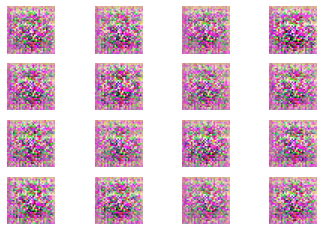

251 [D loss: 9.605515] [G loss: -0.650832]
252 [D loss: 8.976189] [G loss: -0.955654]
253 [D loss: 8.741229] [G loss: -0.628383]
254 [D loss: 5.459580] [G loss: -0.762683]
255 [D loss: 10.057028] [G loss: -0.909096]
256 [D loss: 9.947905] [G loss: -0.922318]
257 [D loss: 6.605127] [G loss: -0.659789]
258 [D loss: 8.042692] [G loss: -0.521796]
259 [D loss: 6.602548] [G loss: -0.739229]
260 [D loss: 8.457747] [G loss: -0.898921]


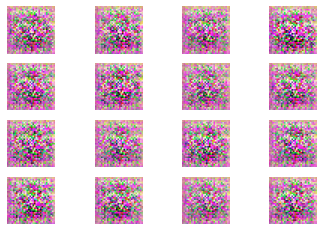

261 [D loss: 8.533136] [G loss: -0.424399]
262 [D loss: 8.615466] [G loss: -0.597208]
263 [D loss: 7.874639] [G loss: -0.896308]
264 [D loss: 7.737809] [G loss: -0.788036]
265 [D loss: 7.798380] [G loss: -0.822398]
266 [D loss: 9.103990] [G loss: -0.804216]
267 [D loss: 6.821320] [G loss: -0.944504]
268 [D loss: 7.303908] [G loss: -0.851466]
269 [D loss: 7.407979] [G loss: -0.589383]
270 [D loss: 8.631143] [G loss: -0.846806]


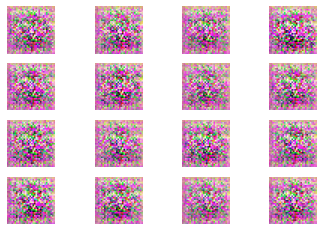

271 [D loss: 6.841024] [G loss: -0.983154]
272 [D loss: 8.975204] [G loss: -0.786804]
273 [D loss: 6.600655] [G loss: -0.877746]
274 [D loss: 8.109608] [G loss: -0.673140]
275 [D loss: 9.786300] [G loss: -0.627259]
276 [D loss: 7.165430] [G loss: -0.577880]
277 [D loss: 8.581885] [G loss: -0.947564]
278 [D loss: 8.841004] [G loss: -0.764732]
279 [D loss: 7.768029] [G loss: -0.799687]
280 [D loss: 9.397182] [G loss: -0.648572]


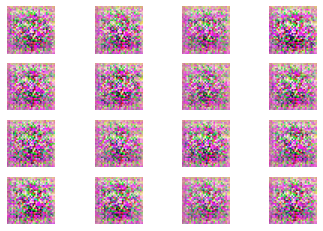

281 [D loss: 7.701457] [G loss: -0.917676]
282 [D loss: 8.673670] [G loss: -0.398380]
283 [D loss: 8.272883] [G loss: -0.951792]
284 [D loss: 6.053587] [G loss: -0.890644]
285 [D loss: 8.916434] [G loss: -0.766762]
286 [D loss: 7.291877] [G loss: -0.464730]
287 [D loss: 7.355526] [G loss: -0.913581]
288 [D loss: 7.935479] [G loss: -0.692184]
289 [D loss: 8.626953] [G loss: -0.648876]
290 [D loss: 6.216005] [G loss: -0.960363]


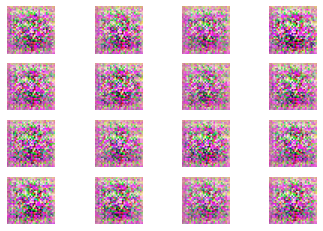

291 [D loss: 6.032201] [G loss: -0.807932]
292 [D loss: 8.158713] [G loss: -0.391624]
293 [D loss: 9.180851] [G loss: -0.554747]
294 [D loss: 7.124204] [G loss: -0.842115]
295 [D loss: 8.548771] [G loss: -0.656819]
296 [D loss: 9.181663] [G loss: -0.929432]
297 [D loss: 9.199103] [G loss: -0.582450]
298 [D loss: 6.874460] [G loss: -0.916584]
299 [D loss: 8.759946] [G loss: -0.620000]
300 [D loss: 7.977727] [G loss: -0.303763]


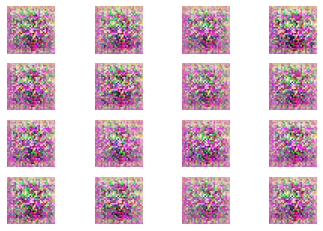

301 [D loss: 8.421835] [G loss: -0.520504]
302 [D loss: 7.928606] [G loss: -0.734612]
303 [D loss: 8.062379] [G loss: -0.258222]
304 [D loss: 7.295368] [G loss: -0.755807]
305 [D loss: 6.588768] [G loss: -0.967734]
306 [D loss: 9.389504] [G loss: -0.222474]
307 [D loss: 8.451196] [G loss: -0.669542]
308 [D loss: 9.597728] [G loss: -0.832766]
309 [D loss: 9.371286] [G loss: -0.841808]
310 [D loss: 8.123893] [G loss: -0.975340]


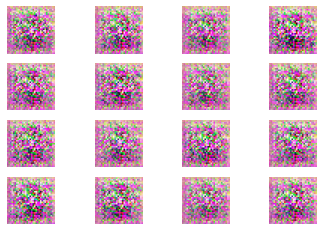

311 [D loss: 7.563339] [G loss: -0.930345]
312 [D loss: 6.383964] [G loss: -0.985762]
313 [D loss: 7.921661] [G loss: -0.837390]
314 [D loss: 8.914509] [G loss: -0.975048]
315 [D loss: 7.187200] [G loss: -0.974371]
316 [D loss: 9.231626] [G loss: -0.654531]
317 [D loss: 8.494250] [G loss: -0.971008]
318 [D loss: 6.483578] [G loss: -0.972795]
319 [D loss: 9.085158] [G loss: -0.460637]
320 [D loss: 5.636044] [G loss: -0.767526]


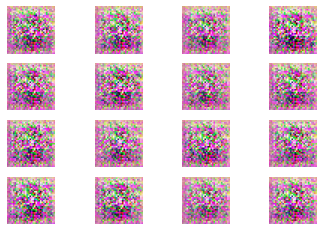

321 [D loss: 7.255398] [G loss: -0.748127]
322 [D loss: 6.394550] [G loss: -0.547104]
323 [D loss: 7.551806] [G loss: -0.846223]
324 [D loss: 8.305044] [G loss: -0.747607]
325 [D loss: 7.287674] [G loss: -0.780506]
326 [D loss: 9.218972] [G loss: -0.875123]
327 [D loss: 9.530627] [G loss: -0.357969]
328 [D loss: 8.174929] [G loss: -0.551500]
329 [D loss: 8.021578] [G loss: -0.489443]
330 [D loss: 6.454715] [G loss: -0.642308]


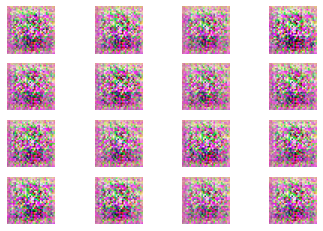

331 [D loss: 7.626121] [G loss: -0.787483]
332 [D loss: 7.372964] [G loss: -0.772028]
333 [D loss: 6.959447] [G loss: -0.980058]
334 [D loss: 8.119028] [G loss: -0.759433]
335 [D loss: 8.665718] [G loss: -0.767846]
336 [D loss: 9.174378] [G loss: -0.860600]
337 [D loss: 7.154757] [G loss: -0.595906]
338 [D loss: 8.080585] [G loss: -0.423160]
339 [D loss: 8.162340] [G loss: -0.673364]
340 [D loss: 9.312381] [G loss: -0.820139]


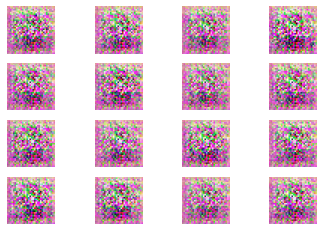

341 [D loss: 8.649667] [G loss: -0.881956]
342 [D loss: 6.944288] [G loss: -0.939340]
343 [D loss: 8.069067] [G loss: -0.616175]
344 [D loss: 7.865470] [G loss: -0.369454]
345 [D loss: 6.464008] [G loss: -0.739913]
346 [D loss: 7.543575] [G loss: -0.787737]
347 [D loss: 7.224186] [G loss: -0.918931]
348 [D loss: 9.239101] [G loss: -0.868049]
349 [D loss: 7.658532] [G loss: -0.874797]
350 [D loss: 6.896536] [G loss: -0.317112]


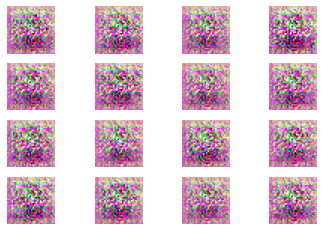

351 [D loss: 6.667591] [G loss: -0.717057]
352 [D loss: 8.026952] [G loss: -0.794249]
353 [D loss: 7.912174] [G loss: -0.741857]
354 [D loss: 7.743737] [G loss: -0.673075]
355 [D loss: 8.023598] [G loss: -0.887100]
356 [D loss: 8.831045] [G loss: -0.863345]
357 [D loss: 7.052759] [G loss: -0.747139]
358 [D loss: 7.687552] [G loss: -0.848620]
359 [D loss: 6.861749] [G loss: -0.793311]
360 [D loss: 7.982412] [G loss: -0.705584]


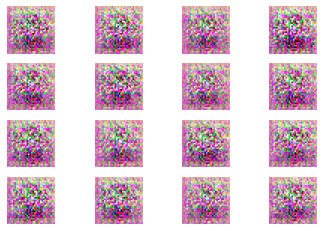

361 [D loss: 6.199123] [G loss: -0.740379]
362 [D loss: 6.696693] [G loss: -0.526060]
363 [D loss: 7.233437] [G loss: -0.850284]
364 [D loss: 6.956162] [G loss: -0.605981]
365 [D loss: 8.404101] [G loss: -0.984784]
366 [D loss: 8.318294] [G loss: -0.926998]
367 [D loss: 9.648121] [G loss: -0.957111]
368 [D loss: 9.909523] [G loss: -0.457135]
369 [D loss: 8.544655] [G loss: -0.575843]
370 [D loss: 8.390110] [G loss: -0.757905]


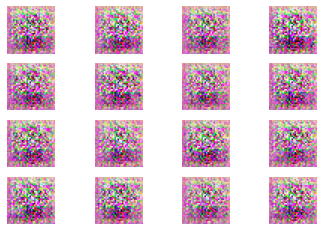

371 [D loss: 8.084467] [G loss: -0.817630]
372 [D loss: 7.742854] [G loss: -0.326153]
373 [D loss: 9.160583] [G loss: -0.696718]
374 [D loss: 8.531593] [G loss: -0.730026]
375 [D loss: 7.451032] [G loss: -0.770217]
376 [D loss: 8.176406] [G loss: -0.896591]
377 [D loss: 6.933856] [G loss: -0.971215]
378 [D loss: 8.559587] [G loss: -0.889370]
379 [D loss: 7.000982] [G loss: -0.856793]
380 [D loss: 7.868744] [G loss: -0.950789]


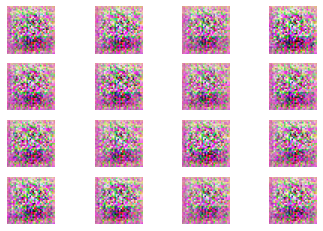

381 [D loss: 7.949109] [G loss: -0.989286]
382 [D loss: 7.933852] [G loss: -0.834224]
383 [D loss: 8.679259] [G loss: -0.900002]
384 [D loss: 7.836667] [G loss: -0.595900]
385 [D loss: 6.925769] [G loss: -0.465200]
386 [D loss: 7.943975] [G loss: -0.665674]
387 [D loss: 8.793047] [G loss: -0.648070]
388 [D loss: 10.343685] [G loss: -0.902112]
389 [D loss: 8.530032] [G loss: -0.952811]
390 [D loss: 9.689356] [G loss: -0.446229]


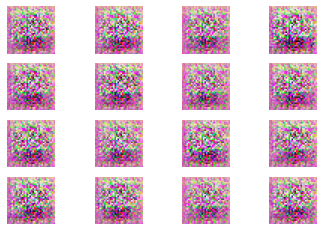

391 [D loss: 4.929881] [G loss: -0.739140]
392 [D loss: 6.894573] [G loss: -0.636859]
393 [D loss: 8.115173] [G loss: -0.571299]
394 [D loss: 7.314879] [G loss: -0.692394]
395 [D loss: 8.889249] [G loss: -0.671521]
396 [D loss: 8.264537] [G loss: -0.997410]
397 [D loss: 8.910071] [G loss: -0.710851]
398 [D loss: 8.558181] [G loss: -0.848454]
399 [D loss: 6.576355] [G loss: -0.808424]
400 [D loss: 8.094407] [G loss: -0.945178]


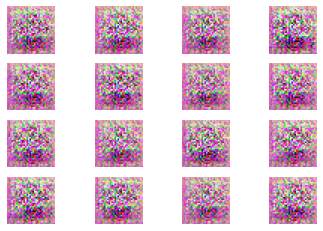

401 [D loss: 6.828032] [G loss: -0.605852]
402 [D loss: 6.504831] [G loss: -0.498896]
403 [D loss: 6.707003] [G loss: -0.940517]
404 [D loss: 5.473444] [G loss: -0.886472]
405 [D loss: 9.172331] [G loss: -0.672957]
406 [D loss: 8.412922] [G loss: -0.992460]
407 [D loss: 7.442440] [G loss: -0.842884]
408 [D loss: 7.298004] [G loss: -0.997403]
409 [D loss: 8.636658] [G loss: -0.813243]
410 [D loss: 8.891684] [G loss: -0.619726]


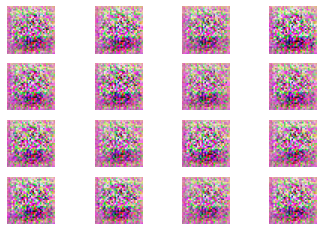

411 [D loss: 6.111098] [G loss: -0.703009]
412 [D loss: 8.292881] [G loss: -0.637127]
413 [D loss: 7.496002] [G loss: -0.802047]
414 [D loss: 7.912396] [G loss: -0.728176]
415 [D loss: 9.225626] [G loss: -0.938840]
416 [D loss: 8.207684] [G loss: -0.746109]
417 [D loss: 8.678916] [G loss: -0.800877]
418 [D loss: 7.659946] [G loss: -0.586196]
419 [D loss: 8.688001] [G loss: -0.755772]
420 [D loss: 6.493852] [G loss: -0.836372]


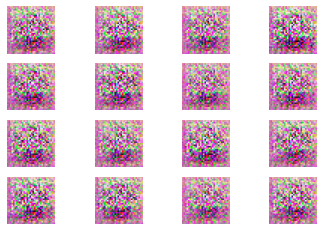

421 [D loss: 7.539939] [G loss: -0.693845]
422 [D loss: 8.466028] [G loss: -0.715360]
423 [D loss: 5.744367] [G loss: -0.760600]
424 [D loss: 7.652017] [G loss: -0.504573]
425 [D loss: 9.283804] [G loss: -0.923896]
426 [D loss: 7.510404] [G loss: -0.711989]
427 [D loss: 7.016726] [G loss: -0.760385]
428 [D loss: 8.226664] [G loss: -0.941665]
429 [D loss: 5.795759] [G loss: -0.859675]
430 [D loss: 8.272141] [G loss: -0.481126]


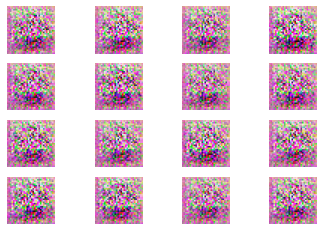

431 [D loss: 8.373589] [G loss: -0.536890]
432 [D loss: 7.769306] [G loss: -0.559750]
433 [D loss: 8.334500] [G loss: -0.799547]
434 [D loss: 7.925291] [G loss: -0.710550]
435 [D loss: 10.010736] [G loss: -0.427843]
436 [D loss: 6.498197] [G loss: -0.656543]
437 [D loss: 9.721601] [G loss: -0.857368]
438 [D loss: 8.756166] [G loss: -0.918375]
439 [D loss: 7.459592] [G loss: -0.893604]
440 [D loss: 8.270581] [G loss: -0.925072]


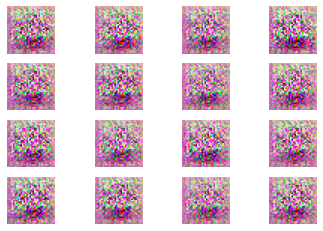

441 [D loss: 7.758365] [G loss: -0.967736]
442 [D loss: 7.191224] [G loss: -0.874442]
443 [D loss: 9.795254] [G loss: -0.987402]
444 [D loss: 7.485983] [G loss: -0.864183]
445 [D loss: 8.822786] [G loss: -0.740547]
446 [D loss: 8.288345] [G loss: -0.571038]
447 [D loss: 8.824065] [G loss: -0.618089]
448 [D loss: 8.151362] [G loss: -0.689626]
449 [D loss: 7.215559] [G loss: -0.612979]
450 [D loss: 8.262384] [G loss: -0.924196]


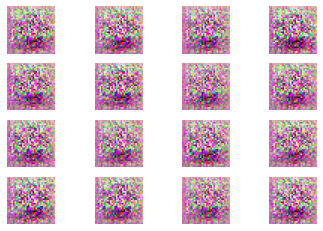

451 [D loss: 8.053339] [G loss: -0.653973]
452 [D loss: 7.566540] [G loss: -0.842457]
453 [D loss: 7.474244] [G loss: -0.807346]
454 [D loss: 9.395334] [G loss: -0.954180]
455 [D loss: 7.826921] [G loss: -0.982992]
456 [D loss: 7.261120] [G loss: -0.923810]
457 [D loss: 8.440020] [G loss: -0.737953]
458 [D loss: 8.707741] [G loss: -0.956919]
459 [D loss: 8.872595] [G loss: -0.849212]
460 [D loss: 6.880644] [G loss: -0.844553]


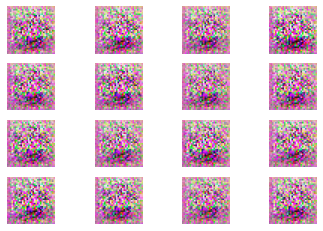

461 [D loss: 7.900485] [G loss: -0.419395]
462 [D loss: 7.703832] [G loss: -0.421341]
463 [D loss: 8.730648] [G loss: -0.929197]
464 [D loss: 9.096429] [G loss: -0.977333]
465 [D loss: 8.831324] [G loss: -0.729394]
466 [D loss: 7.870586] [G loss: -0.681121]
467 [D loss: 8.802677] [G loss: -0.381151]
468 [D loss: 7.331210] [G loss: -0.935522]
469 [D loss: 7.720289] [G loss: -0.779686]
470 [D loss: 7.626242] [G loss: -0.526159]


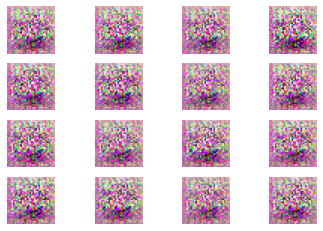

471 [D loss: 9.336635] [G loss: -0.682840]
472 [D loss: 7.914355] [G loss: -0.837459]
473 [D loss: 8.004496] [G loss: -0.867090]
474 [D loss: 8.069575] [G loss: -0.575067]
475 [D loss: 8.279493] [G loss: -0.816495]
476 [D loss: 7.894325] [G loss: -0.951631]
477 [D loss: 8.014017] [G loss: -0.828484]
478 [D loss: 8.664540] [G loss: -0.817094]
479 [D loss: 7.883320] [G loss: -0.624258]
480 [D loss: 8.504012] [G loss: -0.852346]


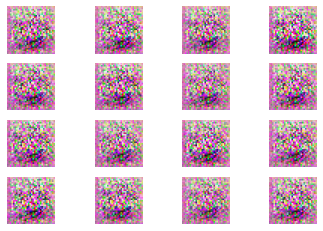

481 [D loss: 6.332366] [G loss: -0.745538]
482 [D loss: 8.403451] [G loss: -0.900917]
483 [D loss: 9.539418] [G loss: -0.677548]
484 [D loss: 7.871555] [G loss: -0.919817]
485 [D loss: 8.463662] [G loss: -0.871063]
486 [D loss: 7.532415] [G loss: -0.952479]
487 [D loss: 7.370375] [G loss: -0.945375]
488 [D loss: 8.878671] [G loss: -0.754922]
489 [D loss: 8.831710] [G loss: -0.951838]
490 [D loss: 9.187775] [G loss: -0.976666]


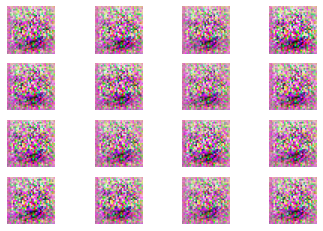

491 [D loss: 8.658361] [G loss: -0.598556]
492 [D loss: 7.477492] [G loss: -0.645726]
493 [D loss: 9.160310] [G loss: -0.921799]
494 [D loss: 8.856424] [G loss: -0.740735]
495 [D loss: 8.973631] [G loss: -0.400357]
496 [D loss: 8.305099] [G loss: -0.610412]
497 [D loss: 7.136954] [G loss: -0.848343]
498 [D loss: 8.463274] [G loss: -0.635885]
499 [D loss: 8.444409] [G loss: -0.929374]
500 [D loss: 7.541091] [G loss: -0.452353]


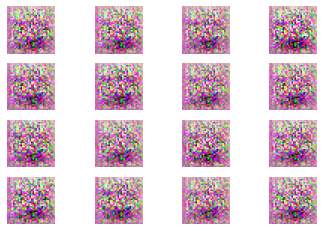

501 [D loss: 8.312700] [G loss: -0.966899]
502 [D loss: 9.261085] [G loss: -0.688083]
503 [D loss: 8.252605] [G loss: -0.650849]
504 [D loss: 8.372768] [G loss: -0.635833]
505 [D loss: 8.174861] [G loss: -0.846217]
506 [D loss: 7.981737] [G loss: -0.770602]
507 [D loss: 8.852718] [G loss: -0.813739]
508 [D loss: 8.951185] [G loss: -0.920650]
509 [D loss: 7.168386] [G loss: -0.872032]
510 [D loss: 7.899791] [G loss: -0.869375]


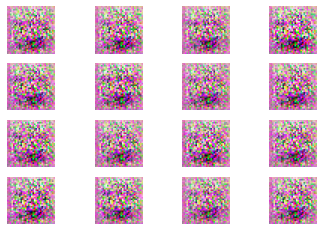

511 [D loss: 7.924572] [G loss: -0.842663]
512 [D loss: 7.256598] [G loss: -0.623326]
513 [D loss: 9.159096] [G loss: -0.929595]
514 [D loss: 6.755994] [G loss: -0.437623]
515 [D loss: 8.904800] [G loss: -0.958048]
516 [D loss: 7.940517] [G loss: -0.752681]
517 [D loss: 5.944815] [G loss: -0.895926]
518 [D loss: 9.032005] [G loss: -0.941847]
519 [D loss: 8.072926] [G loss: -0.784231]
520 [D loss: 8.753308] [G loss: -0.810655]


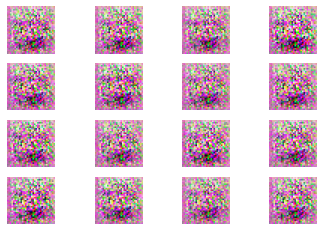

521 [D loss: 8.212504] [G loss: -0.568796]
522 [D loss: 8.184396] [G loss: -0.467059]
523 [D loss: 8.370974] [G loss: -0.955410]
524 [D loss: 9.566859] [G loss: -0.304894]
525 [D loss: 8.351688] [G loss: -0.918530]
526 [D loss: 8.120971] [G loss: -0.758544]
527 [D loss: 7.774706] [G loss: -0.746612]
528 [D loss: 7.163713] [G loss: -0.843454]
529 [D loss: 8.624665] [G loss: -0.839076]
530 [D loss: 8.100460] [G loss: -0.938222]


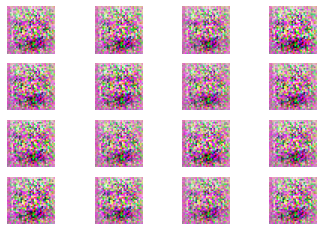

531 [D loss: 8.608319] [G loss: -0.635981]
532 [D loss: 8.422936] [G loss: -0.485208]
533 [D loss: 8.009399] [G loss: -0.809508]
534 [D loss: 9.312259] [G loss: -0.334956]
535 [D loss: 7.914489] [G loss: -0.790207]
536 [D loss: 7.165359] [G loss: -0.724422]
537 [D loss: 8.923669] [G loss: -0.882311]
538 [D loss: 8.765472] [G loss: -0.693293]
539 [D loss: 6.918519] [G loss: -0.837968]
540 [D loss: 9.999605] [G loss: -0.970791]


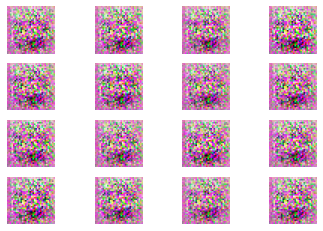

541 [D loss: 7.131639] [G loss: -0.760898]
542 [D loss: 8.185156] [G loss: -0.673967]
543 [D loss: 8.634767] [G loss: -0.805308]
544 [D loss: 7.702058] [G loss: -0.882509]
545 [D loss: 7.970857] [G loss: -0.547830]
546 [D loss: 7.350715] [G loss: -0.676364]
547 [D loss: 8.022991] [G loss: -0.488925]
548 [D loss: 8.955287] [G loss: -0.746155]
549 [D loss: 8.339243] [G loss: -0.787176]
550 [D loss: 9.716734] [G loss: -0.659511]


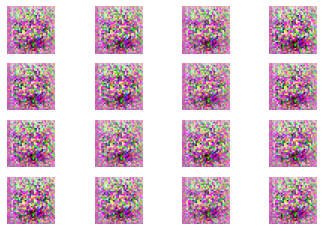

551 [D loss: 7.573293] [G loss: -0.587850]
552 [D loss: 8.667192] [G loss: -0.710266]
553 [D loss: 8.224895] [G loss: -0.827244]


In [ ]:
class RandomWeightedAverage(_Merge):
    def _merge_function(self, inputs):
        alpha = K.random_uniform((4, 1, 1, 1))
        return (alpha * inputs[0]) + ((1 - alpha) * inputs[1])

class WGANGP():
    def __init__(self):
        self.img_rows = 32
        self.img_cols = 32
        self.channels = 3
        self.img_shape = (self.img_rows, self.img_cols, self.channels)
        self.latent_dim = 100

        self.n_critic = 20
        optimizer = RMSprop(lr=0.00005)

        self.generator = self.build_generator()
        self.critic = self.build_critic()

        #-------------------------------
        # Construct Computational Graph
        #       for the Critic
        #-------------------------------

        self.generator.trainable = False

        real_img = Input(shape=self.img_shape)

        z_disc = Input(shape=(self.latent_dim,))
        fake_img = self.generator(z_disc)

        fake = self.critic(fake_img)
        valid = self.critic(real_img)

        interpolated_img = RandomWeightedAverage()([real_img, fake_img])
        validity_interpolated = self.critic(interpolated_img)

        partial_gp_loss = partial(self.gradient_penalty_loss,
                          averaged_samples=interpolated_img)
        partial_gp_loss.__name__ = 'gradient_penalty' # Keras requires function names

        self.critic_model = Model(inputs=[real_img, z_disc],
                            outputs=[valid, fake, validity_interpolated])
        self.critic_model.compile(loss=[self.wasserstein_loss,
                                              self.wasserstein_loss,
                                              partial_gp_loss],
                                        optimizer=optimizer,
                                        loss_weights=[1, 1, 10])
        #-------------------------------
        # Construct Computational Graph
        #         for Generator
        #-------------------------------

        self.critic.trainable = False
        self.generator.trainable = True

        z_gen = Input(shape=(self.latent_dim,))
        img = self.generator(z_gen)
        valid = self.critic(img)
        self.generator_model = Model(z_gen, valid)
        self.generator_model.compile(loss=self.wasserstein_loss, optimizer=optimizer)


    def gradient_penalty_loss(self, y_true, y_pred, averaged_samples):
        """
        Computes gradient penalty based on prediction and weighted real / fake samples
        """
        gradients = K.gradients(y_pred, averaged_samples)[0]
        # compute the euclidean norm by squaring ...
        gradients_sqr = K.square(gradients)
        #   ... summing over the rows ...
        gradients_sqr_sum = K.sum(gradients_sqr,
                                  axis=np.arange(1, len(gradients_sqr.shape)))
        #   ... and sqrt
        gradient_l2_norm = K.sqrt(gradients_sqr_sum)
        # compute lambda * (1 - ||grad||)^2 still for each single sample
        gradient_penalty = K.square(1 - gradient_l2_norm)
        # return the mean as loss over all the batch samples
        return K.mean(gradient_penalty)


    def wasserstein_loss(self, y_true, y_pred):
        return K.mean(y_true * y_pred)

    def build_generator(self):

        model = Sequential()

        model.add(Dense(256 * 2 * 2, activation="relu", input_dim=self.latent_dim, use_bias=False))
        model.add(Reshape((2, 2, 256)))
        # print(model.output_shape)
        model.add(Conv2DTranspose(filters=256, kernel_size=(2, 2),
                                  strides=(2, 2),
                                  padding='same',
                                  name="FIRST_UP_CONV"))
        model.add(BatchNormalization(momentum=0.8, name="B1"))
        model.add(Activation("relu", name="A1"))

        model.add(Conv2DTranspose(filters=128, kernel_size=(4, 4),
                                  strides=(2, 2),
                                  padding='same',
                                  name="SECOND_UP_CONV"))
        model.add(BatchNormalization(momentum=0.8, name="B2"))
        model.add(Activation("relu", name="A2"))

        model.add(Conv2DTranspose(filters=64, kernel_size=(4, 4),
                                  strides=(2, 2),
                                  padding='same',
                                  name="THIRD_UP_CONV"))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Activation("relu", name="A4"))

        model.add(Conv2DTranspose(filters=32, kernel_size=(4, 4),
                                  strides=(2, 2),
                                  padding='same',
                                  name="Fourth_UP_CONV"))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Activation("relu", name="A5"))

        model.add(Conv2DTranspose(filters=16, kernel_size=(4, 4),
                                  strides=(1, 1),
                                  padding='same',
                                  name="Fifth_UP_CONV"))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Activation("relu", name="A6"))

        model.add(Dense(3, activation='tanh', kernel_initializer='glorot_uniform'))

        model.summary()
        # print(model.input.dtype)

        noise = Input(shape=(self.latent_dim,))
        img = model(noise)

        return Model(noise, img)

    def build_critic(self):
        # const = self.ClipConstraint(0.01)
        model = Sequential()

        model.add(Conv2D(16, kernel_size=4, input_shape=self.img_shape))
        model.add(GaussianNoise(1))
        model.add(LeakyReLU())
        model.add(BatchNormalization(momentum=0.8))
        model.add(SpatialDropout2D(0.25))

        model.add(Conv2D(32, kernel_size=4, padding='same', strides=2))
        model.add(GaussianNoise(1))
        # model.add(BatchNormalization(momentum=0.8))
        model.add(LeakyReLU())
        model.add(SpatialDropout2D(0.25))

        model.add(Conv2D(64, kernel_size=4, padding='same', strides=2))
        # model.add(BatchNormalization(momentum=0.8))
        model.add(LeakyReLU())
        model.add(SpatialDropout2D(0.25))

        model.add(Conv2D(64, kernel_size=4, padding='same', strides=2))
        model.add(GaussianNoise(1))
        # model.add(BatchNormalization(momentum=0.8))
        model.add(LeakyReLU())
        model.add(SpatialDropout2D(0.25))

        model.add(Conv2D(128, kernel_size=4, padding='same', strides=2))
        model.add(GaussianNoise(1))
        # model.add(BatchNormalization(momentum=0.8))
        model.add(LeakyReLU())
        model.add(SpatialDropout2D(0.25))

        model.add(Conv2D(256, kernel_size=4, padding='same', strides=1))
        model.add(GaussianNoise(1))
        # model.add(BatchNormalization(momentum=0.8))
        model.add(LeakyReLU())
        model.add(SpatialDropout2D(0.25))

        model.add(Flatten())

        model.add(Dense(1, activation='sigmoid'))

        model.summary()

        img = Input(shape=self.img_shape)
        validity = model(img)

        return Model(img, validity)

    def train(self, epochs, batch_size, sample_interval=50, xT=None):

        # Load the dataset
        X_train = xT

        # Adversarial ground truths
        valid = -np.ones((batch_size, 1))
        fake = np.ones((batch_size, 1))
        dummy = np.zeros((batch_size, 1)) # Dummy gt for gradient penalty
        for epoch in range(epochs):

            for _ in range(self.n_critic):

                # ---------------------
                #  Train Discriminator
                # ---------------------

                # Select a random batch of images
                idx = np.random.randint(0, X_train.shape[0], batch_size)
                imgs = X_train[idx]
                # Sample generator input
                noise = np.random.normal(0, 1, (batch_size, self.latent_dim))
                # Train the critic
                d_loss = self.critic_model.train_on_batch([imgs, noise], [valid, fake, dummy])

            # ---------------------
            #  Train Generator
            # ---------------------

            g_loss = self.generator_model.train_on_batch(noise, valid)

            # Plot the progress
            print ("%d [D loss: %f] [G loss: %f]" % (epoch, d_loss[0], g_loss))

            # If at save interval => save generated image samples
            if epoch % sample_interval == 0:
                self.sample_images(epoch, batch_size)

    def sample_images(self, epoch, batch_size):
        # with tf.device("CPU:0"):
        noise = tf.Session().run(tf.random.normal((batch_size, self.latent_dim), 0, 1, seed=1337))
        noise1 = tf.Session().run(tf.random.normal((batch_size, self.latent_dim), 0, 1, seed=99))
        noise2 = tf.Session().run(tf.random.normal((batch_size, self.latent_dim), 0, 1, seed=154124124))
        noise3 = tf.Session().run(tf.random.normal((batch_size, self.latent_dim), 0, 1, seed=1))

        # noise = tf.compat.v1.make_ndarray(noise)
        gen_imgs = self.generator.predict(noise)
        gen_imgs1 = self.generator.predict(noise1)
        gen_imgs2 = self.generator.predict(noise2)
        gen_imgs3 = self.generator.predict(noise3)

        # Rescale images 0 - 1
        gen_imgs = 0.5 * gen_imgs + 0.5
        gen_imgs1 = 0.5 * gen_imgs1 + 0.5
        gen_imgs2 = 0.5 * gen_imgs2 + 0.5
        gen_imgs3 = 0.5 * gen_imgs3 + 0.5

        # plt.figure()
        fig, axs = plt.subplots(4, 4)
        cnt = 0
        axs[0, 0].imshow(gen_imgs[0, :, :, :])
        axs[0, 1].imshow(gen_imgs1[0, :, :, :])
        axs[0, 2].imshow(gen_imgs2[0, :, :, :])
        axs[0, 3].imshow(gen_imgs3[0, :, :, :])
        axs[1, 0].imshow(gen_imgs[1, :, :, :])
        axs[1, 1].imshow(gen_imgs1[1, :, :, :])
        axs[1, 2].imshow(gen_imgs2[1, :, :, :])
        axs[1, 3].imshow(gen_imgs3[1, :, :, :])
        axs[2, 0].imshow(gen_imgs[2, :, :, :])
        axs[2, 1].imshow(gen_imgs1[2, :, :, :])
        axs[2, 2].imshow(gen_imgs2[2, :, :, :])
        axs[2, 3].imshow(gen_imgs3[2, :, :, :])
        axs[3, 0].imshow(gen_imgs[3, :, :, :])
        axs[3, 1].imshow(gen_imgs1[3, :, :, :])
        axs[3, 2].imshow(gen_imgs2[3, :, :, :])
        axs[3, 3].imshow(gen_imgs3[3, :, :, :])

        for i in range(4):
            for j in range(4):
                # axs[i, j].imshow(gen_imgs[i+j, :, :, :])
                axs[i, j].axis('off')
                # cnt += 1
        format = 'png'
        # fig.savefig(("/content/images/gan_%s." + str(format)) % int(epoch / 10), format=str(format))
        # plt.imsave("brownian_noise_gan_samples/noise%d.png" % epoch, concat_noise)
        plt.show()
        plt.close()


if __name__ == '__main__':
    input("Process IMG? (Enter)")
    # new_images = []
    # root_dir = os.walk('image/')
    # counter = 0
    # for path, subdirs, files in root_dir:
    #     # print(subdirs)
    #     for name in files:
    #         if name.endswith('.jpg'):
    #             print(counter)
    #             counter = counter + 1
    #             new_images.append(img_to_array(load_img(os.path.join(path, name), target_size=(32, 32), interpolation='lanczos')))
    #         if counter == 20000:
    #             break
    #     if counter == 20000:
    #         break
    # images = np.array(new_images, dtype=np.float16)
    # np.save("img_npy_arr_lanczos64.npy", images)
    # exit(1)
    wgan = WGANGP()
    input("Cont?")
    X_train = np.load("/content/img_npy_arr_lanczos64.npy")
    X_train = X_train / 127.5 - 1.

    wgan.train(epochs=30000, batch_size=4, sample_interval=10, xT=X_train)
